In [43]:
import os, re, math
from PIL import Image,ImageDraw,ImageFont
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 14 
matplotlib.rcParams['ytick.labelsize'] = 14 
sns.set_theme(style='white')
matplotlib.rcParams.update({'font.size': 17})
plt.rcParams["figure.figsize"] = (8,7)
#%matplotlib notebook
import matplotlib.ticker as mticker
from scipy.interpolate import interp1d
def color20():
# These are the "Tableau 20" colors as RGB.
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
    for i in range(len(tableau20)):
           r, g, b = tableau20[i]
           tableau20[i] = (r / 255., g / 255., b / 255.)
    return tableau20
sns.set(style="white")
tableau20 = color20() 

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
def log_tick_formatter_linear(val, pos=None):
    e = np.floor(np.log10(val+1))
    v = round(val/10**e, 1)
    return f"${v}\\times10^{int(e)}$"  
def log_tick_formatter_linear_int(val, pos=None):
    e = np.floor(np.log10(val+1))
    v = round(val/10**e, 1)
    return f"$10^{{{int(e)}}}$"  

# Figure 1: phase diagram and dynamics

/tmp/ipykernel_38481/2141628533.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(rname).mean()


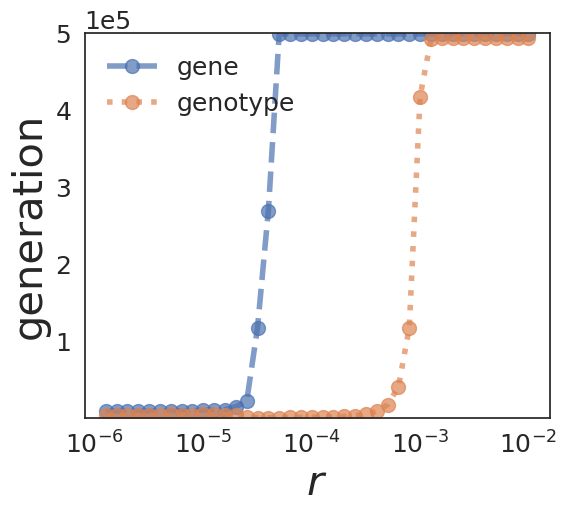

In [71]:
df =pd.read_csv("Data4Plot/phage_diagram_T_Nconstraint.txt")
i=0
%matplotlib inline
plt.figure(figsize=(6,5))
titles = ["phage-host", "phage-phage"]
for rname in ["rH_phagehost"]:
    for N in [10**6]:
        for T in [5*10**5]:
            for constraint in ["no"]:# "no"]:
                for L in [40]:
                    for J in  [0.005]: #set(df["J"]):
                        data = df[(df["L"] == L) & (df["J"] == J) & (df["NY"] == N) & (df[rname]!=0) & (df["simulation_time"]==T)& (df["constraint"]==constraint)]
                        data = data.groupby(rname).mean()
                        x, y = data.index, data["GenePersisentTime"]
                        #x, y = data[rname]*N/L, data["GenePersisentTime"]
                        inds = np.argsort(x)
                        #print(x, y)
                        plt.plot(np.asarray(x)[inds], np.asarray(y)[inds], marker= "o",linewidth = 4, markersize=10, linestyle="dashed", alpha=0.7, label="gene")
                        K = L*(L-1)/2
                        x, y = data.index, data["persTimeHost"]
                        plt.plot(np.asarray(x)[inds], np.asarray(y)[inds], marker= "o",linewidth = 4, markersize=10, linestyle="dotted", label="genotype", alpha=0.7)
            i+=1

plt.legend(fontsize=18,  frameon=False)
plt.ylim((10**3, 5.01*10**5))
ax = plt.gca()
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter_linear))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.offsetText.set(size=18)
plt.xlabel(r"$r$",fontsize =30)
plt.ylabel(r"generation",fontsize =30)
plt.xscale("log")
plt.savefig("phase_transition.pdf", dpi=300, bbox_inches='tight')
plt.show()

# Figure 2: Scaling of temperature $\Theta$ and $\theta$

/tmp/ipykernel_38481/2926324523.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(rname).mean()
/tmp/ipykernel_38481/2926324523.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(rname).mean()
/tmp/ipykernel_38481/2926324523.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(rname).mean()
/tmp/ipykernel_38481/2926324523.py:10: FutureWarning: The defaul

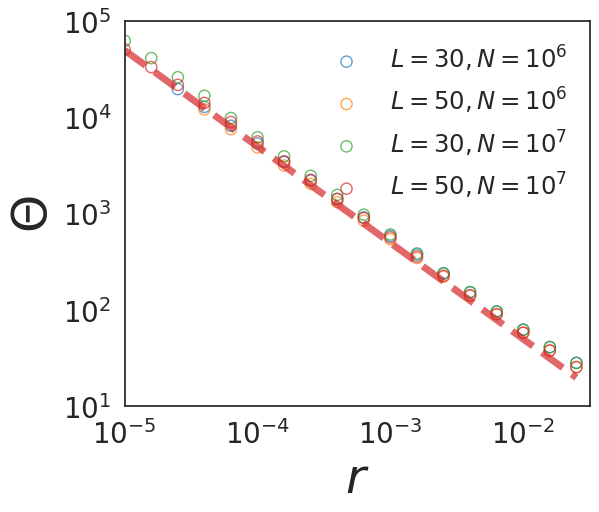

In [109]:
df =pd.read_csv("Data4Plot/diff_genetransf_rL.txt")
count = 0
i =0 
for rname in ["rH_phagehost"]:
    plt.figure(figsize=(6,5))
    for N in [10**6, 10**7]:
        for L in [30, 50]:
            for J in  [0.005]: #set(df["J"]):
                data = df[(df["L"] == L) & (df["J"] == J) & (df["NX"] == N) & (df[rname]!=0)]
                data = data.groupby(rname).mean()
                x, y = data.index, data["theta_GH"]
                #x = data.index*N/L
                #y = N*(2*data.index)/(L)
                inds = np.argsort(x)
                #print(x, y)
                plt.scatter(np.asarray(x)[inds], np.asarray(y)[inds], marker= "o", label=r"$L={0:d}, N=10^{1:d}$".format(int(L), int(np.log10(N))),alpha=0.7, s=65, facecolors='none', edgecolors= tableau20[i])
                i += 2
                #x = np.logspace(-2,-1., 30)
                #plt.plot(x, 1/(x),linewidth=5, linestyle="dashed",color="tab:red")
                #plt.plot(x, 1/(x**0.5),linewidth=5, linestyle="dashed",color="tab:red")
               # plt.plot(x, L/x,linewidth=5, linestyle="dashed", color="tab:red") #color=plt.gca().lines[-1].get_color())
    x = np.logspace(-5.,-1.6, 30)
    plt.plot(x, 1/(2*x),linewidth=5, linestyle="dashed",color="tab:red",alpha=0.7)
   #plt.plot(x, 4/(x**0.5),linewidth=5, linestyle="dashed",color="tab:red")
   # plt.plot(x, N*(1/L -np.sqrt(1/L**2-2/(N*x))),linewidth=5, linestyle="dashed", color=plt.gca().lines[-1].get_color())
    plt.xlabel(r"$r$",fontsize =35)
    plt.ylabel(r"$\Theta$",fontsize =35)
    #plt.title("genotype persistence time",fontsize =25)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim((10**-5, 10**-1.5))
    plt.ylim((10**1.,10**5))
    if count>-1:
        #plt.legend(fontsize=13, loc="lower left")
        count +=1
    plt.legend(fontsize=17.5,  frameon=False)
    plt.savefig("GenotypeTheta"+rname+".pdf", dpi=300, bbox_inches='tight')
    plt.show()

/tmp/ipykernel_38481/157483314.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(rname).mean()
/tmp/ipykernel_38481/157483314.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(rname).mean()
/tmp/ipykernel_38481/157483314.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(rname).mean()
/tmp/ipykernel_38481/157483314.py:10: FutureWarning: The default va

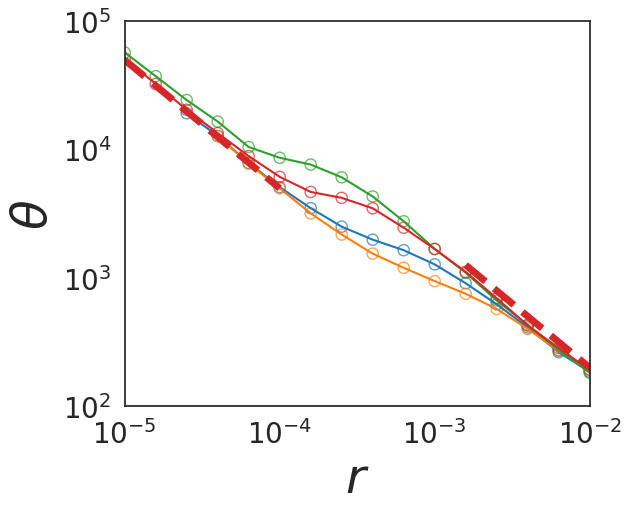

In [105]:
df =pd.read_csv("Data4Plot/diff_genetransf_rL.txt")
count = 0
i = 0 
for rname in ["rH_phagehost"]:
    plt.figure(figsize=(6,5))
    for N in [10**6, 10**7]:
        for L in [30, 50]:
            for J in  [0.005]: #set(df["J"]):
                data = df[(df["L"] == L) & (df["J"] == J) & (df["NX"] == N) & (df[rname]!=0)]
                data = data.groupby(rname).mean()
                x, y = data.index, data["theta_gH"]
                #x = data.index*N/L
                #y = N*(2*data.index)/(L)
                inds = np.argsort(x)
                #print(x, y)
                plt.scatter(np.asarray(x)[inds], np.asarray(y)[inds], marker= "o", label="L={0:d}, N={1:0.0e}, J={2:d}".format(int(L), N, int(J)),alpha=0.7, s=65, facecolors='none', edgecolors= tableau20[i])
                plt.plot(np.asarray(x)[inds], np.asarray(y)[inds], c= tableau20[i])
                i += 2
    x = np.logspace(-5, -4, 30)
   # plt.plot(x, N*(1/L -np.sqrt(1/L**2-2/(N*x))),linewidth=5, linestyle="dashed", color=plt.gca().lines[-1].get_color())
    plt.plot(x, 1/(2*x),linewidth=5, linestyle="dashed",color="tab:red")
    x = np.logspace(-2.8, -1.8, 30)
   # plt.plot(x, N*(1/L -np.sqrt(1/L**2-2/(N*x))),linewidth=5, linestyle="dashed", color=plt.gca().lines[-1].get_color())
    plt.plot(x, 2./x,linewidth=5, linestyle="dashed",color="tab:red")
       # plt.plot(x, N*(1/L -np.sqrt(1/L**2-2/(N*x))),linewidth=5, linestyle="dashed", color=plt.gca().lines[-1].get_color())
    plt.xlabel(r"$r$",fontsize =35)
    plt.ylabel(r"$\theta$",fontsize =35)
    #plt.title("genotype persistence time",fontsize =25)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim((10**-5, 10**-2.))
    plt.ylim((10**2.,10**5))
    #plt.ylim((0,500))
    #plt.ylim((100,500))
    #plt.xlim((10**-2.2, 10**-1.5))
    if count>-1:
        #plt.legend(fontsize=15)
        count +=1
    plt.savefig("Genetheta"+rname+".pdf", dpi=300, bbox_inches='tight')
    plt.show()

# Figure 4: critical gene transfer rates

## Gene

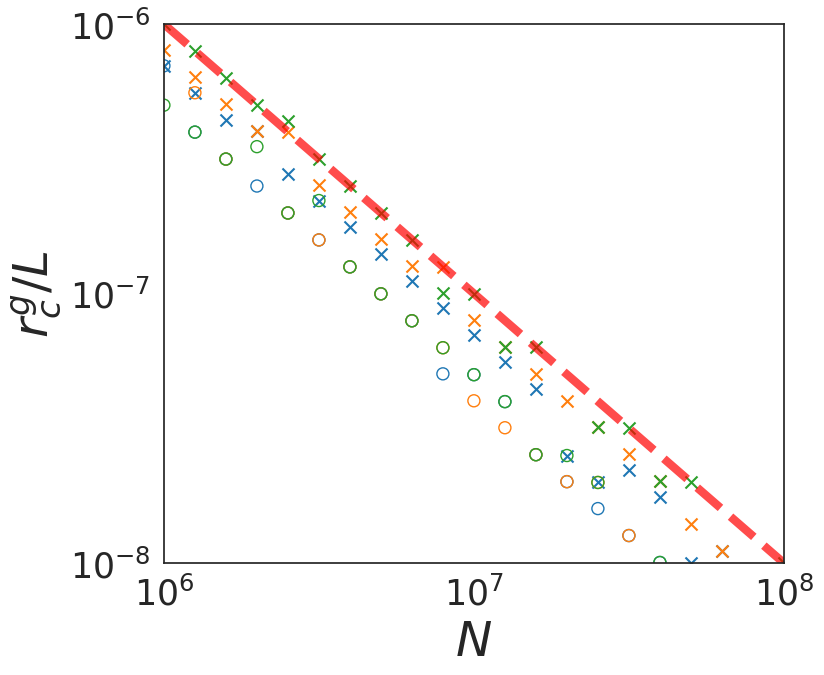

In [124]:
df =pd.read_csv("Data4Plot/phase_critical_r_gene.txt")
i=0
for L in [10, 15, 20]:
    c = tableau20[i]
    i += 2
    d = 2
    data = df[(df["L"]==L) & (df["d"]==d)]
   # plt.scatter(data.NX, (2*data.NX/L)/data.theta_gH-1,marker="o",s=75,facecolors='none',edgecolors=c)
    scatter = plt.scatter(data.NX, data.rH_phagehost/L, label="L="+str(L), facecolors='none',edgecolors=c, marker="o", s=75)
    d = 3
    data = df[(df["L"]==L) & (df["d"]==d)]
    plt.scatter(data.NX, data.rH_phagehost/L,marker="x",s=75, c= scatter.get_edgecolor())
    #plt.scatter(data.NX, (3*data.NX/L)/data.theta_gH-1,marker="x",s=75, c= scatter.get_edgecolor())
N = np.logspace(6.0, 8.0, num=100)
plt.plot(N, 1/(N), linewidth = 6, color="red", linestyle="dashed",alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$N$",fontsize =35)
plt.ylabel(r"$r_c^g/L$",fontsize =35)
#plt.legend(fontsize=35,  frameon=False)
plt.xlim(10**6, 10**8)
plt.ylim(10**-8, 10**-6.)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.savefig("critical_r_gene.pdf", dpi=300, bbox_inches='tight')
#plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

## Genotype

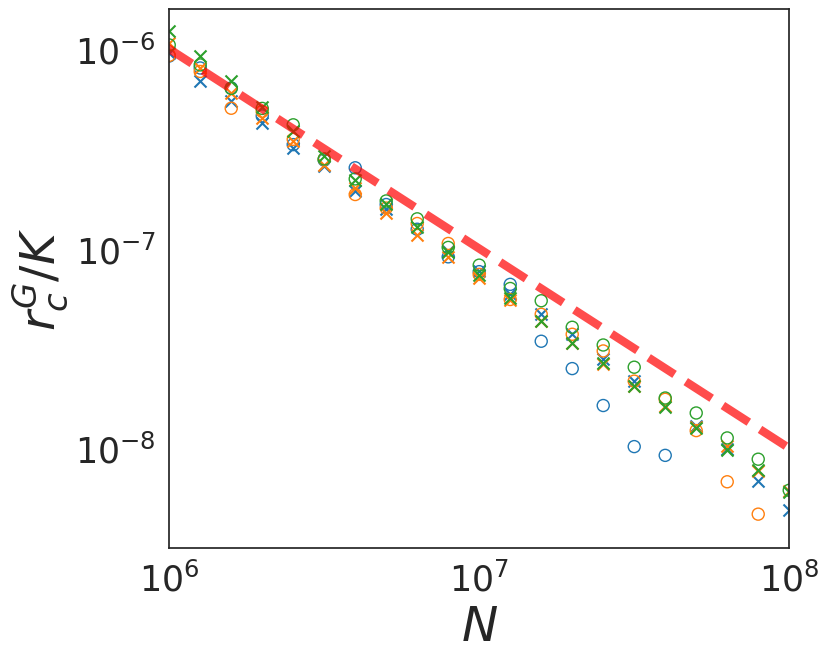

In [122]:
i = 0
for L in [10, 15,  20]:
    N = np.logspace(5.0, 8.0, num=100)
    d = 2
    df =pd.read_csv("Data4Plot/phase_critical_r_genotype.txt")
    data = df[(df["L"]==L) & (df["d"]==d)]
    K = L*(L-1)/2
    c = tableau20[i]
    i += 2
    scatter = plt.scatter(data.NX, data.rH_phagehost/K, label="L="+str(L), facecolors='none',edgecolors=c, marker="o", s=75)
   # plt.plot(N, 1/(N))
    
    d = 3
    df =pd.read_csv("Data4Plot/phase_critical_r_genotype_tripleton.txt")
    K = L*(L-1)*(L-2)/6
    data = df[(df["L"]==L) & (df["d"]==d)]
    plt.scatter(data.NX, data.rH_phagehost/K,marker="x",s=75, c= scatter.get_edgecolor())
plt.plot(N, 1/(N), linewidth = 6, color="red", linestyle="dashed",alpha=0.7)
             
plt.xscale("log")
plt.yscale("log")
#plt.legend(fontsize=25)
plt.xlabel(r"$N$",fontsize =35)
plt.ylabel(r"$r_c^G/K$",fontsize =35)
#plt.legend(fontsize=35,  frameon=False)
plt.xlim(10**6, 10**8)
plt.ylim(10**-8.5, 10**-5.8)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.savefig("critical_r_genotype.pdf", dpi=300, bbox_inches='tight')